In [26]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [27]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [28]:
NUM_CLASSES = 53

# Dataset reading

In [29]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [30]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [32]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [35]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                6960      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 100)               8100      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 53)                2703      
                                                                 
Total params: 22813 (89.11 KB)
Trainable params: 22813

In [36]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [37]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [38]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/5300
38/38 [==============================] - ETA: 0s - loss: 3.8382 - accuracy: 0.0587
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 3s 28ms/step - loss: 3.8382 - accuracy: 0.0587 - val_loss: 3.4574 - val_accuracy: 0.1193
Epoch 2/5300
 7/38 [====>.........................] - ETA: 0s - loss: 3.4466 - accuracy: 0.1038

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/38 [============================>.] - ETA: 0s - loss: 3.2124 - accuracy: 0.1193
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 15ms/step - loss: 3.2084 - accuracy: 0.1197 - val_loss: 2.6590 - val_accuracy: 0.2780
Epoch 3/5300
38/38 [==============================] - ETA: 0s - loss: 2.6301 - accuracy: 0.2092
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 15ms/step - loss: 2.6301 - accuracy: 0.2092 - val_loss: 2.1372 - val_accuracy: 0.4172
Epoch 4/5300
33/38 [=========================>....] - ETA: 0s - loss: 2.2348 - accuracy: 0.2940
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 14ms/step - loss: 2.2148 - accuracy: 0.3011 - val_loss: 1.7528 - val_accuracy: 0.5284
Epoch 5/5300
33/38 [=========================>....] - ETA: 0s - loss: 1.9117 - accuracy: 0.3674
Epoch 5: sa

33/38 [=========================>....] - ETA: 0s - loss: 0.5057 - accuracy: 0.8205
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 14ms/step - loss: 0.5156 - accuracy: 0.8166 - val_loss: 0.3340 - val_accuracy: 0.9026
Epoch 30/5300
37/38 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.8281
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 15ms/step - loss: 0.4860 - accuracy: 0.8272 - val_loss: 0.3355 - val_accuracy: 0.8938
Epoch 31/5300
37/38 [============================>.] - ETA: 0s - loss: 0.4798 - accuracy: 0.8237
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 15ms/step - loss: 0.4804 - accuracy: 0.8234 - val_loss: 0.3196 - val_accuracy: 0.8938
Epoch 32/5300
36/38 [===========================>..] - ETA: 0s - loss: 0.4731 - accuracy: 0.8316
Epoch

Epoch 56/5300
34/38 [=========================>....] - ETA: 0s - loss: 0.2806 - accuracy: 0.9012
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 14ms/step - loss: 0.2829 - accuracy: 0.9001 - val_loss: 0.1693 - val_accuracy: 0.9538
Epoch 57/5300
32/38 [========================>.....] - ETA: 0s - loss: 0.2650 - accuracy: 0.9082
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 14ms/step - loss: 0.2606 - accuracy: 0.9117 - val_loss: 0.1605 - val_accuracy: 0.9532
Epoch 58/5300
33/38 [=========================>....] - ETA: 0s - loss: 0.2814 - accuracy: 0.9003
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 16ms/step - loss: 0.2788 - accuracy: 0.9009 - val_loss: 0.1735 - val_accuracy: 0.9513
Epoch 59/5300
34/38 [=========================>....] - ETA: 0s - loss: 0.2576 - accuracy

Epoch 83/5300
34/38 [=========================>....] - ETA: 0s - loss: 0.1801 - accuracy: 0.9343
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 12ms/step - loss: 0.1768 - accuracy: 0.9365 - val_loss: 0.1085 - val_accuracy: 0.9725
Epoch 84/5300
28/38 [=====================>........] - ETA: 0s - loss: 0.1907 - accuracy: 0.9339
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 9ms/step - loss: 0.1889 - accuracy: 0.9338 - val_loss: 0.1215 - val_accuracy: 0.9694
Epoch 85/5300
31/38 [=======================>......] - ETA: 0s - loss: 0.1803 - accuracy: 0.9325
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 10ms/step - loss: 0.1794 - accuracy: 0.9344 - val_loss: 0.1099 - val_accuracy: 0.9681
Epoch 86/5300
31/38 [=======================>......] - ETA: 0s - loss: 0.1805 - accuracy:

Epoch 110/5300
29/38 [=====================>........] - ETA: 0s - loss: 0.1341 - accuracy: 0.9569
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 7ms/step - loss: 0.1341 - accuracy: 0.9565 - val_loss: 0.0936 - val_accuracy: 0.9813
Epoch 111/5300
37/38 [============================>.] - ETA: 0s - loss: 0.1264 - accuracy: 0.9580
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 8ms/step - loss: 0.1261 - accuracy: 0.9579 - val_loss: 0.0962 - val_accuracy: 0.9763
Epoch 112/5300
30/38 [======================>.......] - ETA: 0s - loss: 0.1334 - accuracy: 0.9609
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 6ms/step - loss: 0.1357 - accuracy: 0.9582 - val_loss: 0.0901 - val_accuracy: 0.9813
Epoch 113/5300
31/38 [=======================>......] - ETA: 0s - loss: 0.1413 - accu

Epoch 137/5300
30/38 [======================>.......] - ETA: 0s - loss: 0.1010 - accuracy: 0.9703
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 9ms/step - loss: 0.0996 - accuracy: 0.9700 - val_loss: 0.0639 - val_accuracy: 0.9913
Epoch 138/5300
30/38 [======================>.......] - ETA: 0s - loss: 0.1101 - accuracy: 0.9656
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 6ms/step - loss: 0.1072 - accuracy: 0.9646 - val_loss: 0.0644 - val_accuracy: 0.9894
Epoch 139/5300
36/38 [===========================>..] - ETA: 0s - loss: 0.0932 - accuracy: 0.9698
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 5ms/step - loss: 0.0940 - accuracy: 0.9696 - val_loss: 0.0647 - val_accuracy: 0.9925
Epoch 140/5300
35/38 [==========================>...] - ETA: 0s - loss: 0.0933 - accu

Epoch 164/5300
35/38 [==========================>...] - ETA: 0s - loss: 0.0797 - accuracy: 0.9748
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 12ms/step - loss: 0.0812 - accuracy: 0.9744 - val_loss: 0.0537 - val_accuracy: 0.9925
Epoch 165/5300
32/38 [========================>.....] - ETA: 0s - loss: 0.0835 - accuracy: 0.9756
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 11ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.0537 - val_accuracy: 0.9925
Epoch 166/5300
36/38 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.9766
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 8ms/step - loss: 0.0776 - accuracy: 0.9765 - val_loss: 0.0534 - val_accuracy: 0.9944
Epoch 167/5300
28/38 [=====================>........] - ETA: 0s - loss: 0.0748 - ac

Epoch 191/5300
38/38 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9786
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 8ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.0515 - val_accuracy: 0.9931
Epoch 192/5300
33/38 [=========================>....] - ETA: 0s - loss: 0.0680 - accuracy: 0.9785
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 7ms/step - loss: 0.0723 - accuracy: 0.9773 - val_loss: 0.0475 - val_accuracy: 0.9938
Epoch 193/5300
31/38 [=======================>......] - ETA: 0s - loss: 0.0600 - accuracy: 0.9831
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 10ms/step - loss: 0.0607 - accuracy: 0.9819 - val_loss: 0.0528 - val_accuracy: 0.9944
Epoch 194/5300
37/38 [============================>.] - ETA: 0s - loss: 0.0685 - acc

Epoch 218/5300
35/38 [==========================>...] - ETA: 0s - loss: 0.0589 - accuracy: 0.9821
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 15ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0526 - val_accuracy: 0.9919
Epoch 219/5300
38/38 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9798
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 1s 16ms/step - loss: 0.0603 - accuracy: 0.9798 - val_loss: 0.0499 - val_accuracy: 0.9944
Epoch 220/5300
31/38 [=======================>......] - ETA: 0s - loss: 0.0499 - accuracy: 0.9831
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 9ms/step - loss: 0.0488 - accuracy: 0.9833 - val_loss: 0.0474 - val_accuracy: 0.9950
Epoch 221/5300
34/38 [=========================>....] - ETA: 0s - loss: 0.0484 - ac

In [39]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9950


In [40]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [41]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 128ms/step
[2.81111561e-08 6.57454692e-16 1.59260816e-11 4.71201744e-08
 8.43407755e-13 1.76920651e-07 1.31149545e-05 5.44740909e-18
 8.92398135e-12 1.81575831e-11 6.12879081e-10 2.25658601e-04
 2.13704983e-24 2.34126718e-10 1.18597319e-11 4.81067896e-18
 1.70377601e-12 2.40330935e-16 1.28691512e-22 6.28015125e-18
 9.99756753e-01 6.44549279e-23 2.63258723e-26 2.43634314e-11
 4.27837358e-06 2.39294579e-15 1.54267323e-18 1.29566739e-16
 7.77724944e-13 2.88693175e-20 6.96402802e-16 1.16697183e-30
 2.14666574e-32 1.00174086e-32 2.23300301e-19 9.37652852e-15
 2.25173160e-08 5.68310850e-11 1.19527081e-14 2.23860952e-09
 5.01253150e-19 6.91176398e-22 2.17524914e-21 1.79383522e-10
 6.67151948e-14 2.45494077e-15 2.62941888e-31 3.20176224e-29
 9.78459927e-20 4.87545151e-14 2.38930212e-11 3.29893710e-23
 3.66742185e-15]
20


# Confusion matrix

51/51 [==============================] - 0s 2ms/step


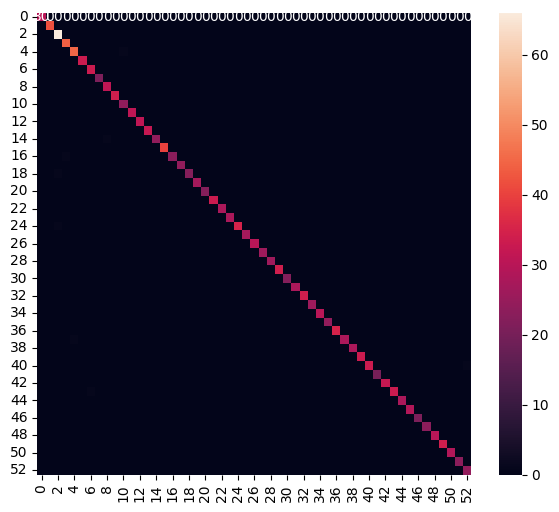

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        42
           2       0.97      1.00      0.99        66
           3       0.98      1.00      0.99        44
           4       0.98      0.98      0.98        46
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.99        33
           7       1.00      1.00      1.00        21
           8       0.97      1.00      0.98        31
           9       1.00      1.00      1.00        34
          10       0.96      1.00      0.98        24
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        32
          14       1.00      0.96      0.98        25
          15       1.00      1.00      1.00        40
          16       1.00      0.96      0.98        24
     

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [43]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpibfp6a42\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpibfp6a42\assets


26392

# Inference test

In [45]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [46]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [47]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [48]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [49]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.68529075e-08 3.59149275e-16 1.03326202e-11 4.08950669e-08
 6.65255990e-13 1.45215282e-07 1.19939068e-05 3.38122297e-18
 7.99869719e-12 1.30979047e-11 7.06207870e-10 2.01408053e-04
 1.22811690e-24 1.94268462e-10 1.01093725e-11 3.87447677e-18
 1.27445808e-12 1.70686125e-16 6.03544289e-23 4.25492319e-18
 9.99782741e-01 3.79131884e-23 1.42892770e-26 2.29743446e-11
 3.67188409e-06 1.85023145e-15 9.13288563e-19 9.19245285e-17
 7.00314210e-13 1.56342338e-20 6.20192230e-16 7.95984213e-31
 1.54803158e-32 5.40796241e-33 1.26875379e-19 5.81475667e-15
 1.69924430e-08 5.31674114e-11 7.70718159e-15 1.92162064e-09
 3.71272315e-19 5.20742659e-22 1.24458310e-21 1.29150066e-10
 3.97208884e-14 1.22411402e-15 1.06444528e-31 1.23863852e-29
 7.76846931e-20 4.17746045e-14 1.97693476e-11 1.73257741e-23
 2.94109279e-15]
20
